# Computing cross-validation techniques and its metrics
On this notebook we are going to compute and analyze diferent cross-validation techniques and its metrics.

How to estimate the accuracy of a linear kernel support vector machine on the iris dataset by splitting the data,
fitting a model and computing the score 5 consecutive times (with different splits each time):

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)

print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.96666667 1.         0.96666667 0.96666667 1.        ]
0.98 accuracy with a standard deviation of 0.02


By default, the score computed at each CV iteration is the score method of the estimator. It is possible to change this by using the scoring parameter:



In [4]:
scores = cross_val_score(
    clf, X, y, cv=5, scoring='f1_macro')

print (scores)

[0.96658312 1.         0.96658312 0.96658312 1.        ]


In [5]:
scores = cross_val_score(
    clf, X, y, cv=5, scoring='accuracy')

print (scores)

[0.96666667 1.         0.96666667 0.96666667 1.        ]


You can find all metrics from sklearn as:

In [6]:
from sklearn import metrics

for metric in metrics.get_scorer_names():
    print(metric)

accuracy
adjusted_mutual_info_score
adjusted_rand_score
average_precision
balanced_accuracy
completeness_score
explained_variance
f1
f1_macro
f1_micro
f1_samples
f1_weighted
fowlkes_mallows_score
homogeneity_score
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted
matthews_corrcoef
max_error
mutual_info_score
neg_brier_score
neg_log_loss
neg_mean_absolute_error
neg_mean_absolute_percentage_error
neg_mean_gamma_deviance
neg_mean_poisson_deviance
neg_mean_squared_error
neg_mean_squared_log_error
neg_median_absolute_error
neg_negative_likelihood_ratio
neg_root_mean_squared_error
normalized_mutual_info_score
positive_likelihood_ratio
precision
precision_macro
precision_micro
precision_samples
precision_weighted
r2
rand_score
recall
recall_macro
recall_micro
recall_samples
recall_weighted
roc_auc
roc_auc_ovo
roc_auc_ovo_weighted
roc_auc_ovr
roc_auc_ovr_weighted
top_k_accuracy
v_measure_score


For more information: 
1. https://scikit-learn.org/stable/api/sklearn.metrics.html
2. https://scikit-learn.org/stable/modules/model_evaluation.html

## Cross validation strategies by passing a cross validation iterator:

In [7]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
print (cv)
cross_val_score(clf, X, y, cv=cv)

ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None)


array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])

## The cross_validate function and multiple metric evaluation

The cross_validate function differs from cross_val_score in two ways:

1. It allows specifying multiple metrics for evaluation.
2. It returns a dict containing fit-times, score-times (and optionally training scores, fitted estimators, train-test split indices) in addition to the test score.


In [8]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, y, return_train_score=True, scoring=scoring)

print (scores.keys())
print(sorted(scores.keys()))

train_precision_macro_mean = scores["train_precision_macro"].mean()
print (f"{train_precision_macro_mean = }")

dict_keys(['fit_time', 'score_time', 'test_precision_macro', 'train_precision_macro', 'test_recall_macro', 'train_recall_macro'])
['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro', 'train_precision_macro', 'train_recall_macro']
train_precision_macro_mean = 0.9825637216505054


## K-Fold Technique

KFold divides all the samples in groups of samples, called folds (if k=n this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using k-1 folds, and the fold left out is used for test.


In [29]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""
    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )
    # Formatting
    yticklabels = list(range(n_splits)) + ["class"]
    ax.set(
        yticks=np.arange(n_splits+1) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

<Axes: title={'center': 'KFold'}, xlabel='Sample index', ylabel='CV iteration'>

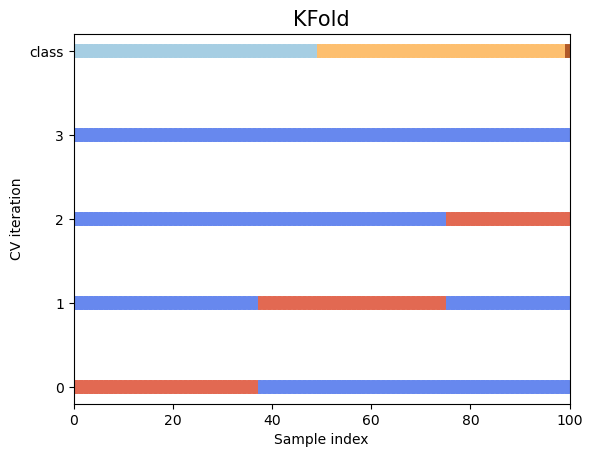

In [30]:
import numpy as np
from sklearn.model_selection import KFold

group_prior = rng.dirichlet([2] * 10)
groups = np.repeat(np.arange(10), rng.multinomial(150, group_prior))

fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, group=None, ax=ax, n_splits=n_splits)

In [61]:
X = ["a", "b", "c", "f"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("train idx={} - test idx={}".format(train, test))
    # Each fold is constituted by two arrays: 
    # the first one is related to the training set, and the second one to the test set. 
    # Thus, one can create the training/test sets using numpy indexing:
    train_data = [X[i] for i in train]
    test_data  = [X[i] for i in test]
    print("train num={} - test num={}".format(train_data, test_data))

#Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=4.

train idx=[2 3] - test idx=[0 1]
train num=['c', 'f'] - test num=['a', 'b']
train idx=[0 1] - test idx=[2 3]
train num=['a', 'b'] - test num=['c', 'f']


[[0. 0.]
 [1. 1.]] [0 1]
